In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# 価格を生成する関数
def create_price(M, d):
    price = np.random.randint(d, 3 * d, size=M)
    return price

In [3]:
# alphaを作成する関数
def alpha_star(M):
    alpha_star = np.random.uniform(100, 200, size=M)
    return alpha_star

In [4]:
# betaを作成する関数
def beta_star(M, M_prime):
    """
    Generate true regression coefficients beta^{(m)*}_{m'} based on the given conditions.

    Parameters:
        M (int): Number of m indices.
        M_prime (int): Number of m' indices.

    Returns:
        numpy.ndarray: Array of generated coefficients with shape (M, M_prime, 3).
    """
    beta_star = np.zeros((M, M_prime, 3))

    for m in range(M):
        for m_prime in range(M_prime):
            if m == m_prime:
                beta_star[m, m_prime] = np.random.normal(-1, 1, 3)
            else:
                beta_star[m, m_prime] = np.random.normal(1, 1, 3)

    return beta_star

In [5]:
print(beta_star(3, 3))

[[[-2.28087349 -0.85774659 -0.95979254]
  [ 0.46763524  1.56287288  0.26975887]
  [ 0.15771478  1.35635161 -0.21271696]]

 [[ 1.46866463  1.78248481 -0.20396777]
  [-3.3010013  -0.76485569  1.64490818]
  [ 1.02611734  1.85335343  0.81148365]]

 [[ 1.67479694  1.970786    2.5738306 ]
  [ 0.75417598  0.2650224   0.76153105]
  [ 0.83819053 -0.41412116  0.43667211]]]


In [6]:
# phi関数
def phi(price, beta):
    phi = beta[0] * price + beta[1] * price**2 + beta[2] * (1 / price)
    return phi

In [7]:
M = 50
# このデータにおけるalpha,betaを作成
alpha = alpha_star(M)
beta = beta_star(M, M)

In [8]:
sigma = 1
# 価格を入れるリストを作成
price_list = []
# 量を入れるリストを作成
quantity_list = []
for i in range(10000):
    price = create_price(M, 100)
    price_list.append(price)
    quantity = []
    for m in range(M):
        sum_beta = 0
        for m_prime in range(M):
            sum_beta += phi(price[m], beta[m][m_prime])
        quantity.append(alpha[m] + sum_beta + np.random.normal(0, sigma, size=1))
    quantity_list.append(sum(quantity))

In [9]:
# 列名の作成
column_names = [f"prodact_{i+1}" for i in range(50)]

In [10]:
# データフレームの作成
df_price = pd.DataFrame(price_list, columns=column_names)

In [11]:
df_price.head()

,prodact_1,prodact_2,prodact_3,prodact_4,prodact_5,prodact_6,prodact_7,prodact_8,prodact_9,prodact_10,...,prodact_41,prodact_42,prodact_43,prodact_44,prodact_45,prodact_46,prodact_47,prodact_48,prodact_49,prodact_50
0,172,162,275,123,224,220,169,118,286,118,...,231,266,231,295,130,151,224,186,205,144
1,213,218,187,138,260,120,244,171,289,197,...,245,247,155,294,158,257,162,162,104,101
2,261,243,163,223,145,175,279,116,215,292,...,101,135,236,245,105,205,204,227,217,142
3,234,257,135,167,281,226,290,131,254,135,...,148,231,294,225,267,129,129,249,202,267
4,210,241,292,119,295,274,196,283,159,146,...,165,120,195,184,225,134,182,133,160,213


In [12]:
# 売上の追加
df_price["sales"] = quantity_list

In [13]:
df_price.head()

,prodact_1,prodact_2,prodact_3,prodact_4,prodact_5,prodact_6,prodact_7,prodact_8,prodact_9,prodact_10,...,prodact_42,prodact_43,prodact_44,prodact_45,prodact_46,prodact_47,prodact_48,prodact_49,prodact_50,sales
0,172,162,275,123,224,220,169,118,286,118,...,266,231,295,130,151,224,186,205,144,[97827348.28185172]
1,213,218,187,138,260,120,244,171,289,197,...,247,155,294,158,257,162,162,104,101,[93222863.47349657]
2,261,243,163,223,145,175,279,116,215,292,...,135,236,245,105,205,204,227,217,142,[97399224.79983321]
3,234,257,135,167,281,226,290,131,254,135,...,231,294,225,267,129,129,249,202,267,[92196617.07914467]
4,210,241,292,119,295,274,196,283,159,146,...,120,195,184,225,134,182,133,160,213,[119378334.35157469]


In [14]:
# 売上をfloat型に変換
df_price["sales"] = df_price["sales"].astype(float)

In [15]:
# 確認
df_price.dtypes

prodact_1       int32
prodact_2       int32
prodact_3       int32
prodact_4       int32
prodact_5       int32
prodact_6       int32
prodact_7       int32
prodact_8       int32
prodact_9       int32
prodact_10      int32
prodact_11      int32
prodact_12      int32
prodact_13      int32
prodact_14      int32
prodact_15      int32
prodact_16      int32
prodact_17      int32
prodact_18      int32
prodact_19      int32
prodact_20      int32
prodact_21      int32
prodact_22      int32
prodact_23      int32
prodact_24      int32
prodact_25      int32
prodact_26      int32
prodact_27      int32
prodact_28      int32
prodact_29      int32
prodact_30      int32
prodact_31      int32
prodact_32      int32
prodact_33      int32
prodact_34      int32
prodact_35      int32
prodact_36      int32
prodact_37      int32
prodact_38      int32
prodact_39      int32
prodact_40      int32
prodact_41      int32
prodact_42      int32
prodact_43      int32
prodact_44      int32
prodact_45      int32
prodact_46

In [16]:
# salesを整数に変換四捨五入
df_price["sales"] = df_price["sales"].round()

In [17]:
# データの確認
df_price.head()

,prodact_1,prodact_2,prodact_3,prodact_4,prodact_5,prodact_6,prodact_7,prodact_8,prodact_9,prodact_10,...,prodact_42,prodact_43,prodact_44,prodact_45,prodact_46,prodact_47,prodact_48,prodact_49,prodact_50,sales
0,172,162,275,123,224,220,169,118,286,118,...,266,231,295,130,151,224,186,205,144,97827348.0
1,213,218,187,138,260,120,244,171,289,197,...,247,155,294,158,257,162,162,104,101,93222863.0
2,261,243,163,223,145,175,279,116,215,292,...,135,236,245,105,205,204,227,217,142,97399225.0
3,234,257,135,167,281,226,290,131,254,135,...,231,294,225,267,129,129,249,202,267,92196617.0
4,210,241,292,119,295,274,196,283,159,146,...,120,195,184,225,134,182,133,160,213,119378334.0


In [18]:
X = df_price[column_names]

In [19]:
Y = df_price["sales"]

In [20]:
# XとYを学習用とテスト用に分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [21]:
# モデルの作成
lr = LinearRegression()

In [22]:
# テストデータを用いてモデルを学習
lr.fit(X_train, Y_train)

LinearRegression()

In [23]:
# テストデータを用いて予測
Y_pred = lr.predict(X_test)

In [24]:
# 予測結果の精度を確認
print(mean_squared_error(Y_test, Y_pred))

1007544130068.054


In [25]:
# モデルの係数を確認
lr.coef_

array([16046.32726048, 19372.35055985, 17298.72349647, 18394.72047751,
       19409.53976402, 18969.42679304, 21131.88399605, 23241.24865821,
       17390.04900281, 20467.09769497, 22727.31984803, 20573.73221389,
       20348.17730225, 21384.17570583, 20725.87472881, 18107.69798073,
       13849.83706371, 18237.47897509, 16458.70981854, 19803.46275153,
       20532.77142162, 15650.20332848, 15133.15736471, 16273.79938938,
       21653.18700585, 22098.99083277, 19161.1329738 , 14401.0796794 ,
       20893.86611275, 14546.51775456, 14940.57732902, 20494.02612945,
       17996.30488441, 24182.09162046, 13045.76286604, 17928.55270421,
       21874.39084855, 19430.94629381, 19607.77975885, 16349.31283716,
       24164.83863387, 22825.86982503, 18566.0624583 , 12751.16453916,
       13679.86624868, 18454.01506669, 12450.41146731, 15761.79324514,
       17982.34568043, 20088.13425917])

In [26]:
# 目的関数の定義（売上の負の値を返す）
def objective_function(prices, coef, intercept):
    # 価格に基づく売上の予測
    sales = np.dot(prices, coef) + intercept

    # 売上を最大化するために、負の値を返す（minimizeは最小化を行うため）
    return -sales

In [27]:
# 初期価格（例えば、各製品の初期価格を100とする）
initial_prices = np.full(M, 100)

In [28]:
# 線形回帰モデルの係数とバイアスを取得
coef_lr = lr.coef_
intercept_lr = lr.intercept_

In [29]:
objective_function(initial_prices, coef_lr, intercept_lr)

-8223572.187083185

In [45]:
# Nelder-Mead法を用いて最適化
result = minimize(
    objective_function,
    initial_prices,
    args=(coef_lr, intercept_lr),
    method="Nelder-Mead",
    options={"adaptive": True},
)

# 最適化された価格
optimal_prices = result.x

print("Optimal Prices:", optimal_prices)

Optimal Prices: [ -9874.82370691  -4159.15038283  -3307.83090124  -2557.10786541
   2684.64032935  10655.31114151  18525.50666588  29354.1878941
 -12231.76001787   6378.56178588  27304.52322387   7335.69424397
   8749.73798713  19813.0624537   10222.40692201  -8554.24214075
 -13128.5940443   -4118.16044556 -15209.53146815  19369.02907925
  10621.99654443  -6183.55105152  -9372.09538397 -15402.50291172
  22737.44485253  21241.08459611    -93.11306952  -8022.65115227
  21755.10205418 -11566.21503773  -6162.37607442   9812.77244894
  -2093.02084362  39509.24053783 -28141.33110143   3975.82356578
  32759.4984813    6243.49513841   5745.06961007 -14284.60490913
  34850.15972452  18888.19808674  -2174.48221744 -29016.65427883
 -26809.60934832   -148.9822241  -42528.775562    -9893.48590643
  -3251.30974722  15993.45447362]


In [31]:
optimal_sales = np.dot(optimal_prices, coef_lr) + intercept_lr
print("Optimal Sales:", optimal_sales)

Optimal Sales: 1.0762754527000664e+20


In [32]:
def sales_function(price, alpha, beta, phi, sigma):
    M = len(price)
    total_sales = 0

    for m in range(M):
        sum_beta = 0
        for m_prime in range(M):
            sum_beta += phi(price[m], beta[m][m_prime])

        quantity = alpha[m] + sum_beta + np.random.normal(0, sigma)
        total_sales += quantity

    return total_sales

In [33]:
def true_objective_function(price, alpha, beta, sigma):
    # 売上の負の値を返す（売上を最大化するため）
    return -sales_function(price, alpha, beta, phi, sigma)

In [46]:
# 最適化の実行
result = minimize(
    true_objective_function,
    initial_prices,
    args=(alpha, beta, sigma),
    method="Nelder-Mead",
    options={"adaptive": True},
)

# 最適化された価格
true_optimal_prices = result.x

print("Optimal Prices:", optimal_prices)

# 最適化された価格での売上
true_optimal_sales = -result.fun
print("Optimal Sales:", optimal_sales)

Optimal Prices: [ -9874.82370691  -4159.15038283  -3307.83090124  -2557.10786541
   2684.64032935  10655.31114151  18525.50666588  29354.1878941
 -12231.76001787   6378.56178588  27304.52322387   7335.69424397
   8749.73798713  19813.0624537   10222.40692201  -8554.24214075
 -13128.5940443   -4118.16044556 -15209.53146815  19369.02907925
  10621.99654443  -6183.55105152  -9372.09538397 -15402.50291172
  22737.44485253  21241.08459611    -93.11306952  -8022.65115227
  21755.10205418 -11566.21503773  -6162.37607442   9812.77244894
  -2093.02084362  39509.24053783 -28141.33110143   3975.82356578
  32759.4984813    6243.49513841   5745.06961007 -14284.60490913
  34850.15972452  18888.19808674  -2174.48221744 -29016.65427883
 -26809.60934832   -148.9822241  -42528.775562    -9893.48590643
  -3251.30974722  15993.45447362]
Optimal Sales: 1.0762754527000664e+20


In [35]:
# optimal_pricesでのtrue_objective_functionの値
dash_sales = true_objective_function(optimal_prices, alpha, beta, sigma)
dash_sales

-7.337528526685491e+32

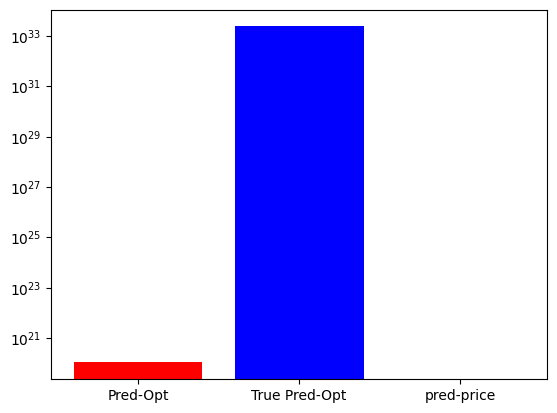

In [36]:
# optimal_salesとtrue_optimal_salesの比較(棒グラフ)(対数軸)

# 色を変更
plt.bar(
    ["Pred-Opt", "True Pred-Opt", "pred-price"],
    [optimal_sales, true_optimal_sales, dash_sales],
    color=["red", "blue", "green"],
)
plt.yscale("log")
plt.savefig("first.jpg", dpi=300)
plt.show()

In [37]:
# 学習データを正規化
X_train_std = (X_train - X_train.mean()) / X_train.std()
# テストデータを正規化
X_test_std = (X_test - X_train.mean()) / X_train.std()

In [38]:
# 正規化したデータを用いてモデルを学習
std_lr = LinearRegression()
std_lr.fit(X_train, Y_train)

LinearRegression()

In [39]:
# Nelder-Mead法を用いて最適化
result = minimize(
    objective_function,
    initial_prices,
    args=(std_lr.coef_, std_lr.intercept_),
    method="Nelder-Mead",
)

In [40]:
# 最適化された価格
std_optimal_prices = result.x
print("Optimal Prices:", std_optimal_prices)

Optimal Prices: [ 4.57974270e+13 -8.97837629e+13 -3.53620502e+13  2.41746353e+14
  2.08309843e+14  1.41026258e+14  2.24880216e+14  4.18653941e+14
 -7.84000767e+14  2.46866015e+14  5.12207174e+14 -2.45337615e+14
  3.41589688e+13 -4.76501040e+14  2.06090063e+14  1.65067236e+14
 -1.80123439e+15  3.10280535e+14  7.53945791e+13 -1.23823233e+14
 -1.82941212e+14 -1.17306890e+14 -5.80072182e+14  2.37561945e+14
  7.16534663e+14  3.45609964e+14 -1.04565921e+14  4.46752426e+14
  2.19901656e+14 -3.23652715e+14 -1.45781820e+14  9.58119402e+13
  3.39231566e+14  5.36655954e+14 -4.80232484e+14 -1.51369375e+14
  4.37108387e+14 -3.37615035e+14 -1.03317354e+14  7.89542928e+14
 -8.49448395e+14  1.16177039e+15  1.29676824e+15  1.14201218e+14
 -3.41100488e+14 -1.38781360e+14 -3.74418212e+14  1.65618660e+14
  4.08087450e+14  1.89144348e+15]


In [41]:
# 最適化された価格での売上
std_optimal_sales = np.dot(std_optimal_prices, std_lr.coef_) + std_lr.intercept_

In [42]:
# optimal_pricesを横一列のcsvに出力
optimal_prices = pd.DataFrame(optimal_prices)
optimal_prices.to_csv("optimal_prices.csv", index=False, header=False)

In [43]:
# df_optimal_pricesを行名をcolumnsにしたデータフレームに変換
df_optimal_prices = pd.read_csv("optimal_prices.csv", header=None)
df_optimal_prices = df_optimal_prices.T
df_optimal_prices.columns = column_names
df_optimal_prices.head()

,prodact_1,prodact_2,prodact_3,prodact_4,prodact_5,prodact_6,prodact_7,prodact_8,prodact_9,prodact_10,...,prodact_41,prodact_42,prodact_43,prodact_44,prodact_45,prodact_46,prodact_47,prodact_48,prodact_49,prodact_50
0,4.579743e+13,-8.978376e+13,-3.536205e+13,2.417464e+14,2.083098e+14,1.410263e+14,2.248802e+14,4.186539e+14,-7.840008e+14,2.468660e+14,...,-8.494484e+14,1.161770e+15,1.296768e+15,1.142012e+14,-3.411005e+14,-1.387814e+14,-3.744182e+14,1.656187e+14,4.080875e+14,1.891443e+15


In [44]:
# df_optimal_pricesをpricesというエクセルファイルに出力

df_optimal_prices.to_excel("prices.xlsx", index=False)